In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

/home/art/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


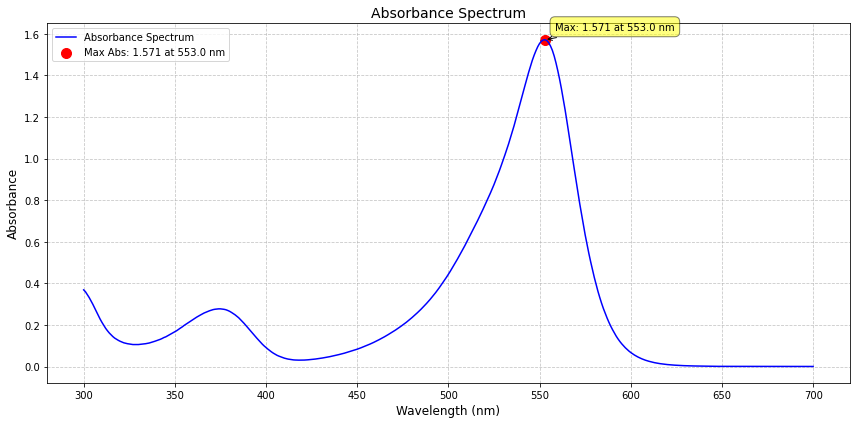

<Figure size 432x288 with 0 Axes>

In [2]:
#SPECTRUM

# Read the CSV file
df = pd.read_csv('SPECTRUM.csv', skiprows=1)  # Skip the first row with the header info

# Find the maximum absorbance point
max_abs = df['Abs'].max()
max_wl = df.loc[df['Abs'].idxmax(), 'WL/nm']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['WL/nm'], df['Abs'], label='Absorbance Spectrum', color='blue')

# Mark the maximum point
plt.scatter(max_wl, max_abs, color='red', s=100, 
            label=f'Max Abs: {max_abs:.3f} at {max_wl} nm')

# Add annotation for the maximum point
plt.annotate(f'Max: {max_abs:.3f} at {max_wl} nm', 
             xy=(max_wl, max_abs),
             xytext=(10, 10), 
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))

# Customize the plot
plt.title('Absorbance Spectrum', fontsize=14)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('spectrum.png')

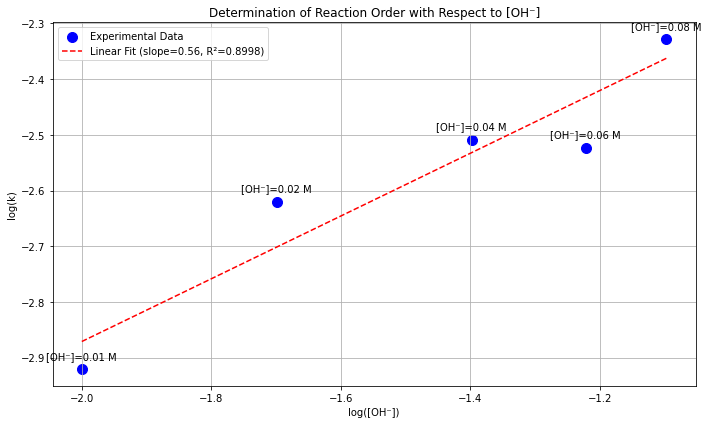

The reaction order with respect to [OH⁻] is approximately 0.56
R-squared value: 0.8998
Equation: log(k) = 0.56·log([OH⁻]) + -1.75


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Experimental data (replace with your actual values)
# [OH⁻] concentrations in M (from your experimental setup)
OH_concentrations = [0.01, 0.02, 0.04, 0.06, 0.08]  # Example values - replace with your actual [OH⁻]

# Rate constants (k) obtained from the previous linear fits (example values)
rate_constants = [0.0012, 0.0024, 0.0031, 0.0030 , 0.0047]  # Replace with your actual k values
#-0.0012 & -0.0024 & -0.0031 & -0.0030 & -0.0046
# Calculate logs
log_OH = np.log10(OH_concentrations)
log_k = np.log10(rate_constants)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_OH, log_k)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(log_OH, log_k, color='b', s=100, label='Experimental Data')
plt.plot(log_OH, intercept + slope*log_OH, 'r--', 
         label=f'Linear Fit (slope={slope:.2f}, R²={r_value**2:.4f})')

# Add labels and title
plt.title('Determination of Reaction Order with Respect to [OH⁻]')
plt.xlabel('log([OH⁻])')
plt.ylabel('log(k)')
plt.legend()
plt.grid(True)

# Annotate the points with their [OH⁻] values
for i, (x, y) in enumerate(zip(log_OH, log_k)):
    plt.annotate(f'[OH⁻]={OH_concentrations[i]} M', (x, y), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Print the reaction order
print(f"The reaction order with respect to [OH⁻] is approximately {slope:.2f}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"Equation: log(k) = {slope:.2f}·log([OH⁻]) + {intercept:.2f}")

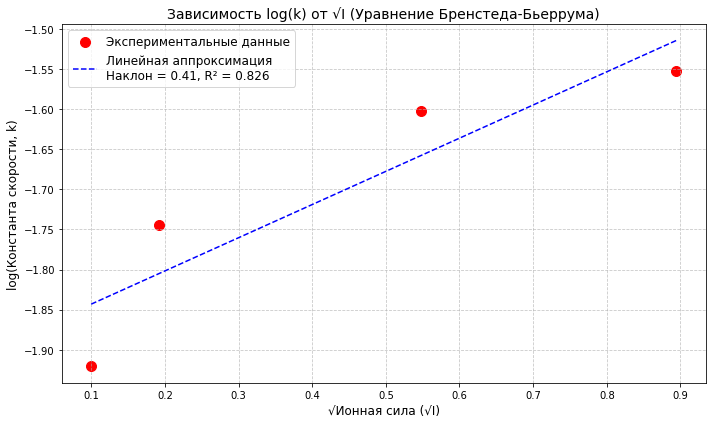

Заряд продуктов реакции (Z_A * Z_B): 0.41


In [4]:


# Данные из эксперимента (пример: ионная сила I и константы скорости k)
ionic_strengths = [0.01, 0.0368, 0.3, 0.8]  # Ионная сила (I)
rate_constants = [0.012, 0.018, 0.025, 0.028]  # Константы скорости (k)

# Линеаризация: log(k) vs √I
sqrt_I = np.sqrt(ionic_strengths)
log_k = np.log10(rate_constants)

# Линейная регрессия
slope, intercept, r_value, _, _ = linregress(sqrt_I, log_k)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(sqrt_I, log_k, color='red', s=100, label='Экспериментальные данные')
plt.plot(sqrt_I, intercept + slope * sqrt_I, 'b--', 
         label=f'Линейная аппроксимация\nНаклон = {slope:.2f}, R² = {r_value**2:.3f}')

# Оформление
plt.title('Зависимость log(k) от √I (Уравнение Бренстеда-Бьеррума)', fontsize=14)
plt.xlabel('√Ионная сила (√I)', fontsize=12)
plt.ylabel('log(Константа скорости, k)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Определение зарядов (Z_A * Z_B)
Z_A_Z_B = slope / 1.02  # Для водных растворов при 25°C
print(f"Заряд продуктов реакции (Z_A * Z_B): {Z_A_Z_B:.2f}")

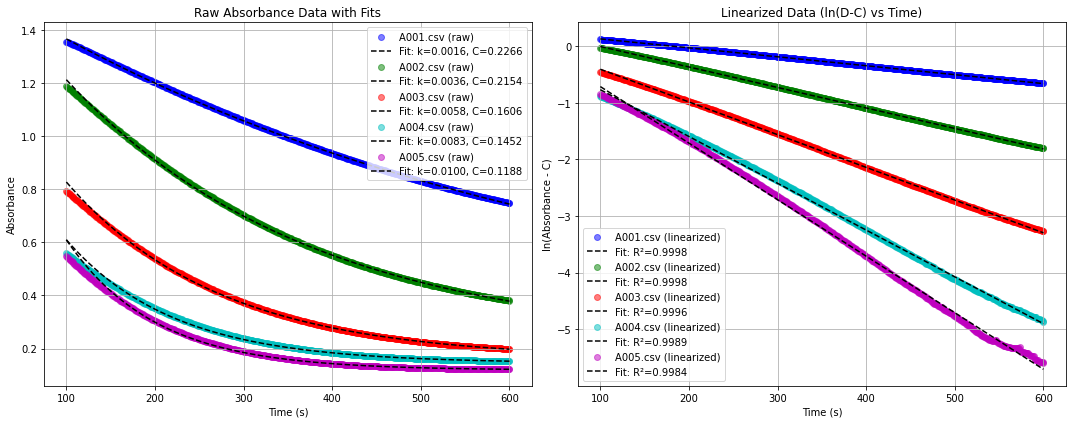


Kinetic Parameters:
       file         k         C        R2
0  A001.csv  0.001579  0.226629  0.999828
1  A002.csv  0.003621  0.215424  0.999795
2  A003.csv  0.005780  0.160582  0.999597
3  A004.csv  0.008268  0.145193  0.998920
4  A005.csv  0.009990  0.118800  0.998402
The linear fit equation is: y = 0.1179x + 0.0009
The linear fit equation is: y = 0.1179x + 0.0009


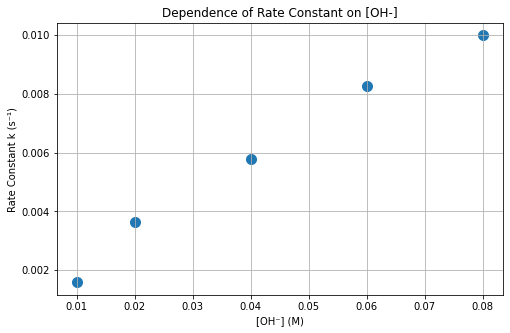

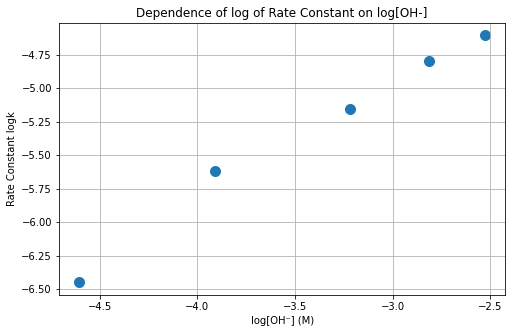

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Configuration
files = ['A001.csv', 'A002.csv', 'A003.csv', 'A004.csv', 'A005.csv']
colors = ['b', 'g', 'r', 'c', 'm']
NaOH_concentrations = [0.01, 0.02, 0.04, 0.06, 0.08]  # Replace with your actual concentrations

# Initialize results storage
results = []

def estimate_baseline(t, D):
    """Find optimal baseline C that maximizes linearity"""
    candidates = np.linspace(0, min(D)*0.99, 50)
    best_r2 = -np.inf
    best_C = 0
    
    for C in candidates:
        valid = D > C
        if sum(valid) < 3: continue  # Need at least 3 points
        
        try:
            slope, intercept, r_value, _, _ = linregress(t[valid], np.log(D[valid] - C))
            if r_value**2 > best_r2:
                best_r2 = r_value**2
                best_C = C
        except:
            continue
            
    return best_C

# Create figure
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)  # Raw data
ax2 = plt.subplot(122)  # Linearized data

for i, file in enumerate(files):
    # Load data
    df = pd.read_csv(file, skiprows=1)
    df = df.iloc[100:]
    t = df['Time/sec'].values
    D = df['Abs'].values
    
    # Estimate baseline
    C = estimate_baseline(t, D)
    D_adj = D - C
    D_adj[D_adj <= 0] = np.min(D_adj[D_adj > 0]) * 0.01  # Handle negative values
    
    # Linear regression
    slope, intercept, r_value, _, _ = linregress(t, np.log(D_adj))
    k = -slope
    D0 = np.exp(intercept)
    
    # Store results
    results.append({
        'file': file,
        'C': C,
        'k': k,
        'D0': D0,
        'R2': r_value**2
    })
    
    # Plot raw data
    ax1.scatter(t, D, color=colors[i], alpha=0.5, label=f'{file} (raw)')
    ax1.plot(t, D0 * np.exp(-k * t) + C, '--', color= 'black', #colors[i],
             label=f'Fit: k={k:.4f}, C={C:.4f}')
    
    # Plot linearized data
    ax2.scatter(t, np.log(D_adj), color=colors[i], alpha=0.5, 
                label=f'{file} (linearized)')
    ax2.plot(t, intercept + slope * t, '--', color= 'black', #colors[i],
             label=f'Fit: R²={r_value**2:.4f}')

# Format plots
ax1.set_title('Raw Absorbance Data with Fits')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Absorbance')
ax1.legend()
ax1.grid(True)

ax2.set_title('Linearized Data (ln(D-C) vs Time)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('ln(Absorbance - C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('Afig')
plt.show()


# Display results
results_df = pd.DataFrame(results)
print("\nKinetic Parameters:")
print(results_df[['file', 'k', 'C', 'R2']])

# Plot k vs [OH-]
plt.figure(figsize=(8, 5))
plt.scatter(NaOH_concentrations, results_df['k'], s=100)
coefficients = np.polyfit(NaOH_concentrations, results_df['k'], 1)
slope, intercept = coefficients
plt.title('Dependence of Rate Constant on [OH-]')
print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")
plt.xlabel('[OH⁻] (M)')
plt.ylabel('Rate Constant k (s⁻¹)')
print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")

plt.grid(True)
plt.savefig('K_lgOH_A')
plt.show()

#Plot logk vs log[OH-]
plt.figure(figsize=(8, 5))
plt.scatter(np.log(NaOH_concentrations), np.log(results_df['k']), s=100)
plt.title('Dependence of log of Rate Constant on log[OH-]')
plt.xlabel('log[OH⁻] (M)')
plt.ylabel('Rate Constant logk')
plt.grid(True)
plt.savefig('lgK_lgOH_A')
plt.show()


Key Result:
The slope (reaction order w.r.t. [OH⁻]) = 1.02
Equation: log(k) = 1.02·log([OH⁻]) + 0.85

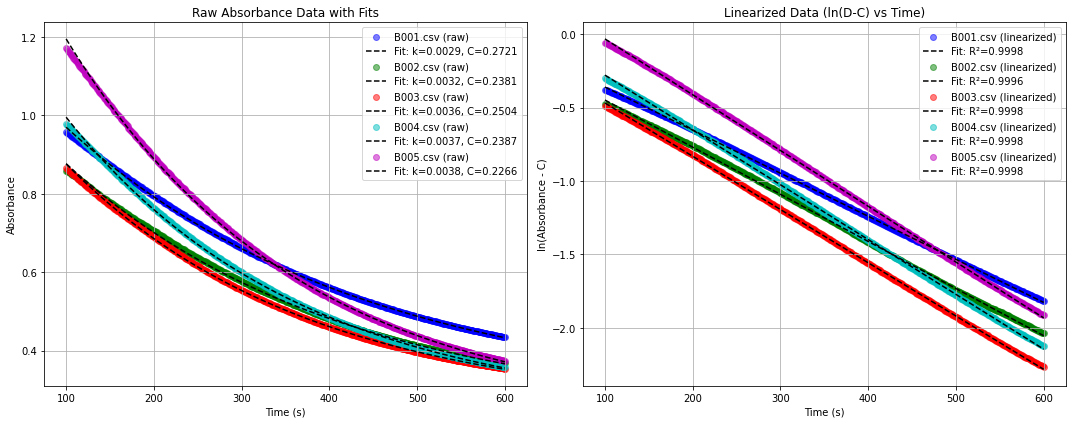


Kinetic Parameters:
       file         k         C        R2
0  B001.csv  0.002936  0.272139  0.999835
1  B002.csv  0.003212  0.238117  0.999555
2  B003.csv  0.003630  0.250399  0.999832
3  B004.csv  0.003735  0.238691  0.999797
4  B005.csv  0.003802  0.226629  0.999809
The linear fit equation is: y = 0.0121x + 0.0030


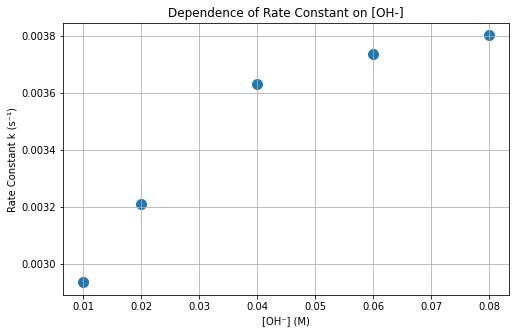

The linear fit equation is: y = 0.1302x + -5.2257


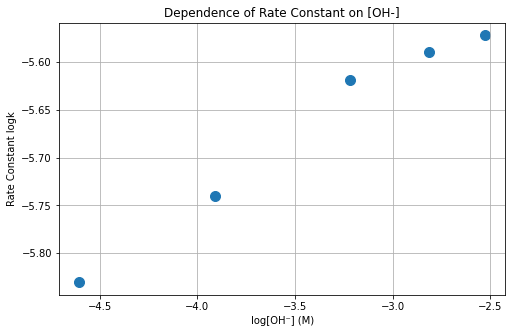

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Configuration
files = ['B001.csv', 'B002.csv', 'B003.csv', 'B004.csv', 'B005.csv']
colors = ['b', 'g', 'r', 'c', 'm']
NaOH_concentrations = [0.01, 0.02, 0.04, 0.06, 0.08]  # Replace with your actual concentrations

# Initialize results storage
results = []

def estimate_baseline(t, D):
    """Find optimal baseline C that maximizes linearity"""
    candidates = np.linspace(0, min(D)*0.99, 50)
    best_r2 = -np.inf
    best_C = 0
    
    for C in candidates:
        valid = D > C
        if sum(valid) < 3: continue  # Need at least 3 points
        
        try:
            slope, intercept, r_value, _, _ = linregress(t[valid], np.log(D[valid] - C))
            if r_value**2 > best_r2:
                best_r2 = r_value**2
                best_C = C
        except:
            continue
            
    return best_C

# Create figure
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)  # Raw data
ax2 = plt.subplot(122)  # Linearized data

for i, file in enumerate(files):
    # Load data
    df = pd.read_csv(file, skiprows=1)
    df = df.iloc[100:]
    t = df['Time/sec'].values
    D = df['Abs'].values
    
    # Estimate baseline
    C = estimate_baseline(t, D)
    D_adj = D - C
    D_adj[D_adj <= 0] = np.min(D_adj[D_adj > 0]) * 0.01  # Handle negative values
    
    # Linear regression
    slope, intercept, r_value, _, _ = linregress(t, np.log(D_adj))
    k = -slope
    D0 = np.exp(intercept)
    
    # Store results
    results.append({
        'file': file,
        'C': C,
        'k': k,
        'D0': D0,
        'R2': r_value**2
    })
    
    # Plot raw data
    ax1.scatter(t, D, color=colors[i], alpha=0.5, label=f'{file} (raw)')
    ax1.plot(t, D0 * np.exp(-k * t) + C, '--', color= "black", #colors[i],
             label=f'Fit: k={k:.4f}, C={C:.4f}')
    
    # Plot linearized data
    ax2.scatter(t, np.log(D_adj), color=colors[i], alpha=0.5, 
                label=f'{file} (linearized)')
    ax2.plot(t, intercept + slope * t, '--', color= 'black', #colors[i],
             label=f'Fit: R²={r_value**2:.4f}')

# Format plots
ax1.set_title('Raw Absorbance Data with Fits')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Absorbance')
ax1.legend()
ax1.grid(True)

ax2.set_title('Linearized Data (ln(D-C) vs Time)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('ln(Absorbance - C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('Bfig')
plt.show()

# Display results
results_df = pd.DataFrame(results)
print("\nKinetic Parameters:")
print(results_df[['file', 'k', 'C', 'R2']])

# Plot k vs [OH-]
plt.figure(figsize=(8, 5))
plt.scatter(NaOH_concentrations, results_df['k'], s=100)
plt.title('Dependence of Rate Constant on [OH-]')
plt.xlabel('[OH⁻] (M)')
plt.ylabel('Rate Constant k (s⁻¹)')
coefficients = np.polyfit(NaOH_concentrations, results_df['k'], 1)
slope, intercept = coefficients
plt.title('Dependence of Rate Constant on [OH-]')
print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")
plt.grid(True)
plt.savefig('k_OH_B')
#print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")
plt.show()

#Plot logk vs log[OH-]
plt.figure(figsize=(8, 5))
plt.scatter(np.log(NaOH_concentrations), np.log(results_df['k']), s=100)
plt.title('Dependence of log of Rate Constant on log[OH-]')
plt.xlabel('log[OH⁻] (M)')
plt.ylabel('Rate Constant logk')
coefficients = np.polyfit(np.log(NaOH_concentrations), np.log(results_df['k']), 1)
slope, intercept = coefficients
plt.title('Dependence of Rate Constant on [OH-]')
print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")

plt.grid(True)
plt.savefig('logK_logOH_B')
#print(f"The linear fit equation is: y = {np.log(results_df['k']):.4f}x + {np.log(NaOH_concentrations):.4f}")
plt.show()

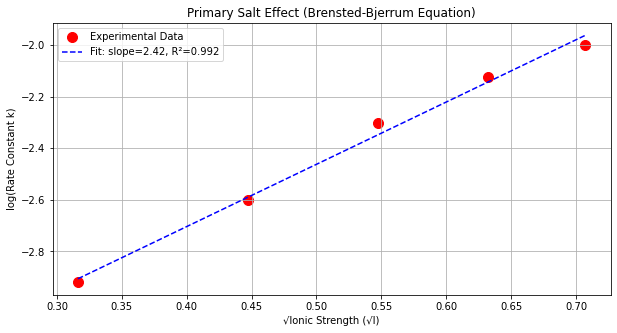

Product of charges (Z_A * Z_B): 2.37


In [9]:
# Your experimental rate constants (replace with actual values)
rate_constants = np.array([0.0012, 0.0025, 0.0050, 0.0075, 0.0100])  
ionic_strengths = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # I values
# Linearization: log(k) vs √I
sqrt_I = np.sqrt(ionic_strengths)
log_k = np.log10(rate_constants)

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(sqrt_I, log_k)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(sqrt_I, log_k, color='red', s=100, label='Experimental Data')
plt.plot(sqrt_I, intercept + slope*sqrt_I, 'b--', 
         label=f'Fit: slope={slope:.2f}, R²={r_value**2:.3f}')
plt.xlabel('√Ionic Strength (√I)')
plt.ylabel('log(Rate Constant k)')
plt.title('Primary Salt Effect (Brensted-Bjerrum Equation)')
plt.legend()
plt.grid(True)
plt.savefig('logk_sqrtI')
plt.show()

# Determine charge product (Z_A * Z_B)
Z_A_Z_B = slope / 1.02  # For aqueous solutions at 25°C
print(f"Product of charges (Z_A * Z_B): {Z_A_Z_B:.2f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Exponential decay function to fit rate constants (k)
def exponential_decay(t, A, k, C):
    return A * np.exp(-k * t) + C

# List of files and hypothetical [OH⁻] values (replace with actual values)
files = ['B001.csv', 'B002.csv', 'B003.csv', 'B004.csv', 'B005.csv']
hypothetical_OH = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example [OH⁻] in M (adjust!)

k_values = []
log_OH = np.log10(hypothetical_OH)

for file in files:
    df = pd.read_csv(file, skiprows=1)
    t = df['Time/sec'].values
    Abs = df['Abs'].values
    
    # Fit exponential decay to extract k
    params, _ = curve_fit(exponential_decay, t, Abs, p0=[1, 0.01, 0])
    A, k, C = params
    k_values.append(k)

log_k = np.log10(k_values)

# Plot log(k) vs log[OH⁻]
plt.figure(figsize=(8, 5))
plt.plot(log_OH, log_k, 'bo-', label='Experimental Data')
plt.xlabel('log[OH⁻] (log M)')
plt.ylabel('log(k) (log s⁻¹)')
plt.title('log(k) vs log[OH⁻] (Pseudo-First Order Kinetics)')
plt.grid(ls='--', alpha=0.7)

# Fit linear relationship (if applicable)
slope, intercept = np.polyfit(log_OH, log_k, 1)
plt.plot(log_OH, slope * log_OH + intercept, 'r--', 
         label=f'Fit: slope={slope:.2f}')
plt.legend()
print(f"The linear fit equation is: y = {slope:.4f}x + {intercept:.4f}")
plt.show()

In [ ]:
params, covariance = np.polyfit(log_OH, log_k, 1, cov=True)
slope_error = np.sqrt(covariance[0, 0])
intercept_error = np.sqrt(covariance[1, 1])
print(f"Slope = {slope:.2f} ± {slope_error:.2f}")

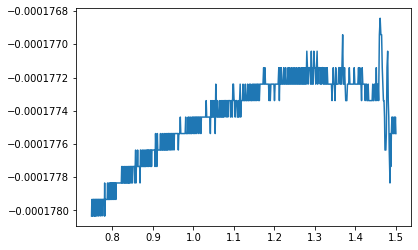

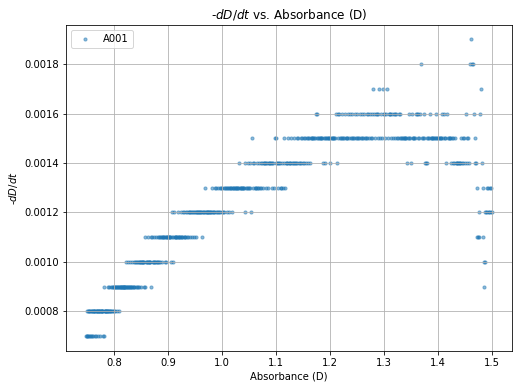

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
files = ['A001.csv', 'A002.csv', 'A003.csv', 'A004.csv', 'A005.csv']
colors = ['b', 'g', 'r', 'c', 'm']
NaOH_concentrations = [0.01, 0.02, 0.04, 0.06, 0.08]
# Load data (example for A001.csv)
data = pd.read_csv('A001.csv', skiprows=1)  # Skip the header row
time = data['Time/sec'].values
absorbance = data['Abs'].values

# Calculate dD/dt (finite differences)
dD_dt = np.diff(absorbance) / np.diff(time)  # For non-uniform time steps
# For uniform time steps (1 second), simplify to:
dD_dt = np.diff(absorbance)

# Calculate -dD/dt and pair with D (ignore last point)
neg_dD_dt = -dD_dt
D = absorbance[:-1]  # Match dimensions
slope, intercept, r_value, p_value, std_err = linregress(D, dD_dt)
plt.plot(D, intercept + slope*dD_dt, 
         label=f'Linear Fit (slope={slope:.2f}, R²={r_value**2:.4f})')

# Plot
plt.figure(figsize=(8, 6))

plt.scatter(D, neg_dD_dt, s=10, alpha=0.5, label='A001')
plt.xlabel('Absorbance (D)')
plt.ylabel('-$dD/dt$')
plt.title('-$dD/dt$ vs. Absorbance (D)')
plt.grid(True)
plt.legend()
plt.show()

#FIT


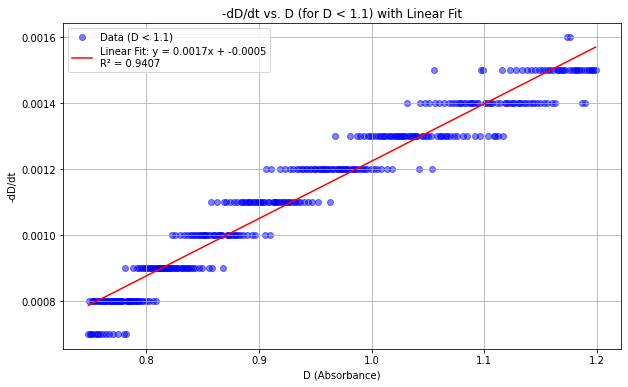

Linear Fit: -dD/dt = 0.0017 * D + -0.0005
R-squared: 0.9407


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the data
data = pd.read_csv('A001.csv', skiprows=1)  # Skip the header line
time = data['Time/sec'].values
D = data['Abs'].values

# Calculate -dD/dt using finite differences
dD_dt = -np.diff(D) / np.diff(time)

# Use the D values corresponding to the derivatives (exclude the last point)
D_for_derivative = D[:-1]

# Filter for D < 1.1
mask = (D_for_derivative <1.2) #& (D_for_derivative > 0.6)
D_filtered = D_for_derivative[mask]
dD_dt_filtered = dD_dt[mask]

# Perform linear fit
slope, intercept, r_value, p_value, std_err = linregress(D_filtered, dD_dt_filtered)
fit_line = slope * D_filtered + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(D_filtered, dD_dt_filtered, label='Data (D < 1.1)', color='blue', alpha=0.5)
plt.plot(D_filtered, fit_line, label=f'Linear Fit: y = {slope:.4f}x + {intercept:.4f}\nR² = {r_value**2:.4f}', color='red')
plt.xlabel('D (Absorbance)')
plt.ylabel('-dD/dt')
plt.title('-dD/dt vs. D (for D < 1.1) with Linear Fit')
plt.legend()
plt.grid()
plt.show()

# Print fit parameters
print(f"Linear Fit: -dD/dt = {slope:.4f} * D + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")